version 1.0.0
#![GMV](http://www.gmv.com/export/system/modules/com.gmv.teresa.site/resources/imagenes/generales/logo.gif) + ![Apache Spark](http://spark.apache.org/images/spark-logo.png)

# Intrusion Detection System

Abstract 
--------

Security and privacy of a system is compromised, when an intrusion happens. Intrusion Detection System (IDS) plays vital role in network security as it detects various types of attacks in network. So here, we are going to propose Intrusion Detection System using machine learning algorithms. The proposed system will be done by conducting some experiments using [NSL-KDD Cup’99](http://nsl.cs.unb.ca/NSL-KDD/) dataset which is improved version of [KDD Cup’99 data set](http://archive.ics.uci.edu/ml/datasets/KDD+Cup+1999+Data).

Data Mining Process
------------------- 
The [Cross Industry Standard Process for Data Mining](https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining) introduced a process model for data mining in 2000 that has become widely adopted.

<a href="https://en.wikipedia.org/wiki/Cross_Industry_Standard_Process_for_Data_Mining"> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/479px-CRISP-DM_Process_Diagram.png" title="Cross Industry Standard Process for Data Mining" alt="CRISP-DM_Process_Diagram"/></a>



The model emphasizes the ***iterative*** nature of the data mining process, distinguishing several different stages that are regularly revisited in the course of developing and deploying data-driven solutions to business problems
* Business understanding
* Data understanding
* Data preparation
* Modeling
* Deployment

# Business Understanding

Nowadays the cyber security threats are rising and putting in risk a great number of organizations. Any organization could be a target for the attackers that produce huge damages into it.

For these reasons it's necessary to provide a system that help to detect intruders in a network. This intrusion detection system should be non-invasive to other systems to provide a quick deployment and to get results a soon as possible. 

It's also important to balance the number of false positives (that increase the maintenance of the system) with the number of false negatives (that would allow to intruders achieve their objectives)

# Data Understanding

**KDD Cup'99 data set** used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between **``bad'' connections**, called intrusions or attacks, and **``good'' normal connections**. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

**NSL-KDD** is a data set suggested to solve some of the inherent problems of the KDD'99 data set. Although, this new version of the KDD data set still suffers from some of the problems and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods. Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable

A connection is a sequence of TCP packets starting and ending at some well defined times, between which data flows to and from a source IP address to a target IP address under some well defined protocol.  Each connection is labeled as either normal, or as an attack, with exactly one specific attack type.  Each connection record consists of about 100 bytes.

Attacks fall into four main categories:

* DOS: denial-of-service, e.g. syn flood;
* R2L: unauthorized access from a remote machine, e.g. guessing password;
* U2R:  unauthorized access to local superuser (root) privileges, e.g., various ``buffer overflow'' attacks;
* probing: surveillance and other probing, e.g., port scanning.

It is important to note that the test data is not from the same probability distribution as the training data, and it includes specific attack types not in the training data.  This makes the task more realistic.  Some intrusion experts believe that most novel attacks are variants of known attacks and the "signature" of known attacks can be sufficient to catch novel variants.  The datasets contain a total of 24 training attack types, with an additional 14 types in the test data only. 

### Derived Features ###

Higher-level features had been defined that help in distinguishing *normal* connections from *attacks*.  There are several categories of derived features.

**Intrinsic attributes**

These attributes are extracted from the headers' area of the network packets.

Col|Feature name  | description |	type
---|--------------|-------------|------------
1  |duration 	  |length (number of seconds) of the connection |continuous
2  |protocol_type |type of the protocol, e.g. tcp, udp, etc. |discrete
3  |service 	  |network service on the destination, e.g., http, telnet, etc. |discrete
4  |flag 	      |normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR 	|discrete 
5  |src_bytes 	  |number of data bytes from source to destination 	|continuous
6  |dst_bytes 	  |number of data bytes from destination to source 	|continuous
7  |land 	      |1 if connection is from/to the same host/port; 0 otherwise 	|discrete
8  |wrong_fragment|sum of bad checksum packets in a connection 	|continuous
9  |urgent 	      |number of urgent packets. Urgent packets are packets with the urgent bit activated 	|continuous



**Content attributes** 

These attributes are extracted from the contents area of the network packets based on expert person knowledge.

Col|Feature name	      |description 	|type
---|----------------------|-------------|-----
10 |hot 	              |sum of hot actions in a connection such as: entering a system direc- tory, creating programs and executing programs	|continuous
11 |num_failed_logins 	  |number of failed login attempts 	|continuous
12 |logged_in 	          |1 if successfully logged in; 0 otherwise 	|discrete
13 |num_compromised 	  |number of "compromised" conditions 	|continuous
14 |root_shell 	          |1 if root shell is obtained; 0 otherwise 	|discrete
15 |su_attempted 	      |1 if "su root" command attempted; 0 otherwise 	|discrete
16 |num_root 	          |number of "root'" accesses 	|continuous
17 |num_file_creations 	  |number of file creation operations 	|continuous
18 |num_shells 	          |number of shell prompts 	|continuous
19 |num_access_files 	  |number of operations on access control files 	|continuous
20 |num_outbound_cmds	  |number of outbound commands in an ftp session 	|continuous
21 |is_hot_login 	      |1 if the login belongs to the "hot" list; 0 otherwise 	|discrete
22 |is_guest_login 	      |1 if the login is a "guest" login; 0 otherwise 	|discrete

**Traffic attributes**

These attributes are calculated taking into account the previous connections. 9+10 attributes are divided into two groups: (1) time traffic features (2) machine traffic features. The difference between one group and the other is the mode to select the previous connections.


*Time traffic attributes*

To calculate these attributes we considered the connections that occurred in the past 2 seconds.

Col|Feature name	      |description 	|type
---|----------------------|-------------|-----
23 |count 	              |sum of connections to the same destination IP address |continuous
24 |srv_count 	          |sum of connections to the same destination port number |continuous
25 |serror_rate 	      |the percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)|continuous
26 |srv_serror_rate 	  |the percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)|continuous
27 |rerror_rate 	      |the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)|continuous
29 |same_srv_rate 	      |the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)|continuous
28 |srv_rerror_rate 	  |the percentage of connections that were to the same service, among the connections aggregated in count (23)|continuous
30 |diff_srv_rate 	      |the percentage of connections that were to different services, among the connections aggregated in count (23)|continuous
31 |srv_diff_host_rate 	  |the percentage of connections that were to different destination ma- chines among the connections aggregated in srv_count (24)|continuous

*Machine traffic attributes*

To calculate these attributes we took into account the previous 100 connections.

Col|Feature name	      |description 	|type
---|----------------------|-------------|-----
32 |dst_host_count        |sum of connections to the same destination IP address   |continuous
33 |dst_host_srv_count    |sum of connections to the same destination port number  |continuous
34 |dst_host_same_srv_rate|the percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32)|continuous 
35 |dst_host_diff_srv_rate|the percentage of connections that were to different services, among the connections aggregated in dst_host_count (32)|continuous 
36 |dst_host_same_src_port_rate|the percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_count (33)|continuous 
37 |dst_host_srv_diff_host_rate|the percentage of connections that were to different destination ma- chines, among the connections aggregated in dst_host_srv_count (33)|continuous 
38 |dst_host_serror_rate  |the percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)|continuous
39 |dst_host_srv_serror_rate|the percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_count (33)|continuous 
40 |dst_host_rerror_rate  |the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)|continuous
41 |dst_host_srv_rerror_rate|the percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_count (33)|continuous 



**Class attribute**

The 42nd attribute is the ***class*** attribute, it indicates which type of connections is each instance: normal or which attack. The values it can take are the following: *anomaly, dict, dict_simple, eject, eject-fail, ffb, ffb_clear, format, format_clear, format-fail, ftp-write, guest, imap, land, load_clear, loadmodule, multihop, perl_clear, perlmagic, phf, rootkit, spy, syslog, teardrop, warez, warezclient, warezmaster, pod, back, ip- sweep, neptune, nmap, portsweep, satan, smurf and normal.

## Data Exploration

In [3]:
%matplotlib inline

### Libraries

In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Seaborn palette setting

In [5]:
sns.set_palette("deep", desat=.6)
sns.set_context("notebook")
sns.set_style("whitegrid")
sns.set(font= 'serif', font_scale=0.75)

### Reading Data File

In [6]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import * 
sqlContext = SQLContext(sc)

In [7]:
textFileConn = sc.textFile('../data/KDD/KDDTrain+.txt')

In [8]:
textFileConn.count()

125973

In [9]:
textFileConn.take(3)

[u'0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20',
 u'0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.00,0.00,0.00,0.00,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15',
 u'0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.00,1.00,0.00,0.00,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19']

In [10]:
#Creating the schema

#we define the name of the columns
columnNames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
              "wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised",
              "root_shell","su_attempted","num_root","num_file_creations","num_shells",
              "num_access_files","num_outbound_cmds","is_hot_login","is_guest_login","count",
              "srv_count","serror_rate","srv_serror_rate","rerror_rate","same_srv_rate",
              "srv_rerror_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count",
              "dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate",
              "dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
              "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate",
              "attack"
              ]

In [11]:
#quick fields initialitation all for FloatType
connFields = [StructField(colName, FloatType(), True) for colName in columnNames]

In [12]:
#we proceed to modify the respective fields so that they reflect the correct data type:
connFields[1].dataType = StringType()
connFields[2].dataType = StringType()
connFields[3].dataType = StringType()
connFields[6].dataType = StringType()
connFields[11].dataType = StringType()
connFields[13].dataType = StringType()
connFields[14].dataType = StringType()
connFields[20].dataType = StringType()
connFields[21].dataType = StringType()
connFields[41].dataType = StringType()

In [13]:
connFields

[StructField(duration,FloatType,true),
 StructField(protocol_type,StringType,true),
 StructField(service,StringType,true),
 StructField(flag,StringType,true),
 StructField(src_bytes,FloatType,true),
 StructField(dst_bytes,FloatType,true),
 StructField(land,StringType,true),
 StructField(wrong_fragment,FloatType,true),
 StructField(urgent,FloatType,true),
 StructField(hot,FloatType,true),
 StructField(num_failed_logins,FloatType,true),
 StructField(logged_in,StringType,true),
 StructField(num_compromised,FloatType,true),
 StructField(root_shell,StringType,true),
 StructField(su_attempted,StringType,true),
 StructField(num_root,FloatType,true),
 StructField(num_file_creations,FloatType,true),
 StructField(num_shells,FloatType,true),
 StructField(num_access_files,FloatType,true),
 StructField(num_outbound_cmds,FloatType,true),
 StructField(is_hot_login,StringType,true),
 StructField(is_guest_login,StringType,true),
 StructField(count,FloatType,true),
 StructField(srv_count,FloatType,true)

In [14]:
# we can construct our schema, which we will use later below for building the data frame
connSchema = StructType(connFields)

In [15]:
connSchema

StructType(List(StructField(duration,FloatType,true),StructField(protocol_type,StringType,true),StructField(service,StringType,true),StructField(flag,StringType,true),StructField(src_bytes,FloatType,true),StructField(dst_bytes,FloatType,true),StructField(land,StringType,true),StructField(wrong_fragment,FloatType,true),StructField(urgent,FloatType,true),StructField(hot,FloatType,true),StructField(num_failed_logins,FloatType,true),StructField(logged_in,StringType,true),StructField(num_compromised,FloatType,true),StructField(root_shell,StringType,true),StructField(su_attempted,StringType,true),StructField(num_root,FloatType,true),StructField(num_file_creations,FloatType,true),StructField(num_shells,FloatType,true),StructField(num_access_files,FloatType,true),StructField(num_outbound_cmds,FloatType,true),StructField(is_hot_login,StringType,true),StructField(is_guest_login,StringType,true),StructField(count,FloatType,true),StructField(srv_count,FloatType,true),StructField(serror_rate,FloatT

In [16]:
#Parsing the file
def parseReg(p):
    return ( float(p[0])
            ,p[1], p[2], p[3] 
            ,float(p[4])
            ,float(p[5])
            ,p[6]
            ,float(p[7])
            ,float(p[8])
            ,float(p[9])
            ,float(p[10])
            ,p[11]
            ,float(p[12])
            ,p[13], p[14]
            ,float(p[15])
            ,float(p[16])
            ,float(p[17])
            ,float(p[18])
            ,float(p[19])
            ,p[20], p[21]
            ,float(p[22])
            ,float(p[23])
            ,float(p[24])
            ,float(p[25])
            ,float(p[26])
            ,float(p[27])
            ,float(p[28])
            ,float(p[29])
            ,float(p[30])
            ,float(p[31])
            ,float(p[32])
            ,float(p[33])
            ,float(p[34])
            ,float(p[35])
            ,float(p[36])
            ,float(p[37])
            ,float(p[38])
            ,float(p[39])
            ,float(p[40])
            ,p[41])

In [17]:
connParsedFile = (textFileConn.map(lambda line: line.split(','))
                              .map(parseReg))

In [18]:
# We are now ready to build our data frame, using the connParsedFile RDD computed above and the schema 
# variable already calculated:
conn = sqlContext.createDataFrame(connParsedFile, connSchema)
conn.cache()

DataFrame[duration: float, protocol_type: string, service: string, flag: string, src_bytes: float, dst_bytes: float, land: string, wrong_fragment: float, urgent: float, hot: float, num_failed_logins: float, logged_in: string, num_compromised: float, root_shell: string, su_attempted: string, num_root: float, num_file_creations: float, num_shells: float, num_access_files: float, num_outbound_cmds: float, is_hot_login: string, is_guest_login: string, count: float, srv_count: float, serror_rate: float, srv_serror_rate: float, rerror_rate: float, same_srv_rate: float, srv_rerror_rate: float, diff_srv_rate: float, srv_diff_host_rate: float, dst_host_count: float, dst_host_srv_count: float, dst_host_same_srv_rate: float, dst_host_diff_srv_rate: float, dst_host_same_src_port_rate: float, dst_host_srv_diff_host_rate: float, dst_host_serror_rate: float, dst_host_srv_serror_rate: float, dst_host_rerror_rate: float, dst_host_srv_rerror_rate: float, attack: string]

In [19]:
# Infer the schema, and register the DataFrame as a table.
conn.registerTempTable("connection")

### Auxiliary functions

In [20]:
def percentageOf(df, colName=''):
    """Calculate the percentage of each categorical value of colName from de DataFrame df
    
    Keyword arguments:
    df -- the DataFrame
    colName -- the name of the column
    """
    rows = df.groupBy(colName).count().collect()
    total = 0
    for r in rows:
        total += r.asDict()["count"]
    dictResult = {r.asDict()[colName]: 1.0*r.asDict()["count"]/total for r in rows}
    return sorted(dictResult.items(), key=lambda x: x[1], reverse= True)

In [21]:
def numberOf(df, colName=''):
    """Calculate the number of each categorical value of colName from de DataFrame df
    
    Keyword arguments:
    df -- the DataFrame
    colName -- the name of the column
    """
    rows = df.groupBy(colName).count().collect()
    dictResult = {r.asDict()[colName]: r.asDict()['count'] for r in rows}
    return sorted(dictResult.items(), key=lambda x: x[1], reverse= True)

### Univariate Analysis

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous

In [22]:
#Statistics with all data
conn.describe('duration').toPandas()

,summary,duration
0,count,125973
1,mean,287.1446500440571
2,stddev,2604.5049689634798
3,min,0.0
4,max,42908.0


##### The data set is big --> Getting only a sample of the data set for the analysis

In [23]:
connSample = conn.sample(True, 0.05).toPandas()

In [24]:
connSample.duration.describe()

count     6456.000000
mean       249.030824
std       2297.854419
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      42406.000000
Name: duration, dtype: float64

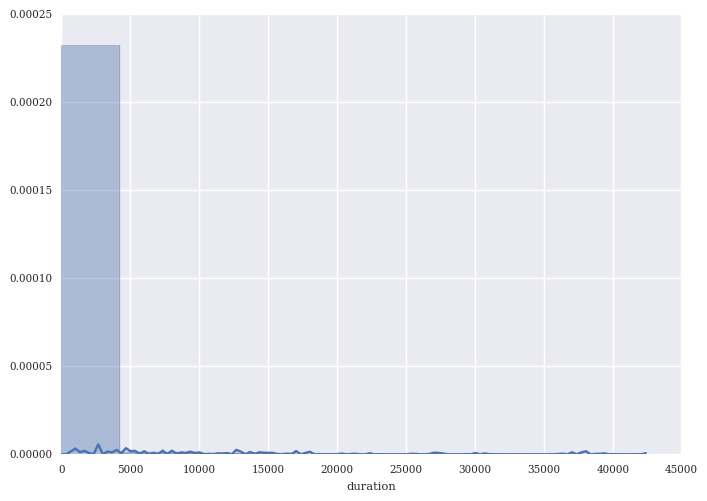

In [25]:
sns.distplot(connSample.duration, bins = 10);

##### Skew distribution -> log transformation

In [26]:
np.log(connSample.duration+1).describe()

count    6456.000000
mean        0.297717
std         1.399609
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.655069
Name: duration, dtype: float64

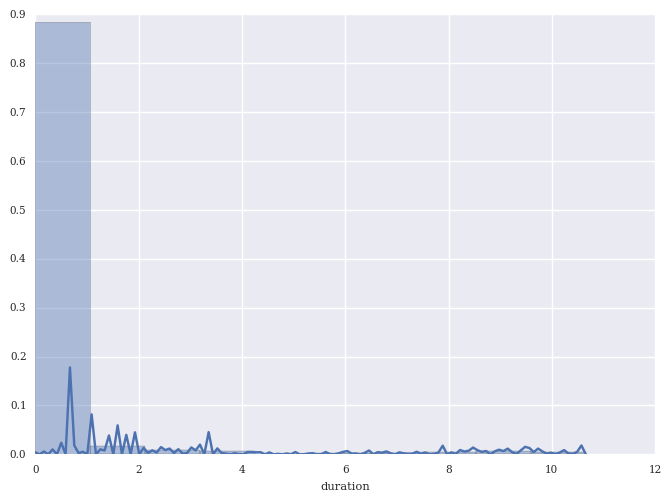

In [27]:
sns.distplot(np.log(connSample.duration+1), bins=10);

##### Let's inspect how many values are equal to 0:

In [28]:
print "Numbers of 0's in duration feature: ", len(connSample.duration[connSample.duration == 0])
print "The percentage of 0's in duration feature:", 100.0*len(connSample.duration[connSample.duration == 0])/len(connSample.duration)

Numbers of 0's in duration feature:  5987
The percentage of 0's in duration feature: 92.7354399009


##### Inspecting the distribution without 0's

In [29]:
np.log(connSample.duration[connSample.duration>0]+1).describe()

count    469.000000
mean       4.098214
std        3.377888
min        0.693147
25%        1.098612
50%        2.772589
75%        7.841886
max       10.655069
Name: duration, dtype: float64

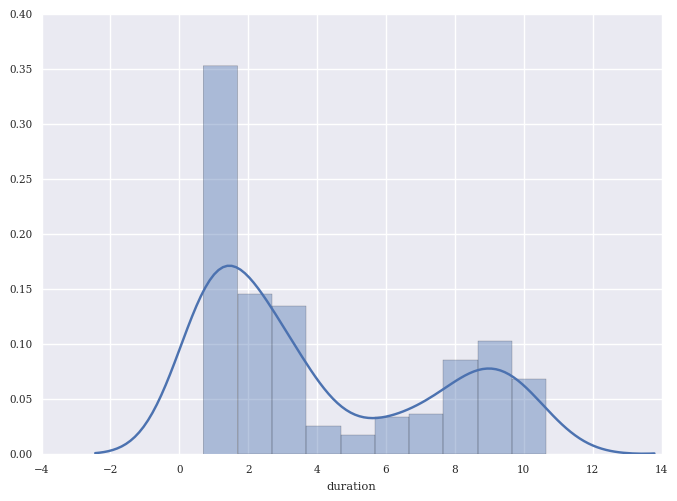

In [30]:
sns.distplot(np.log(connSample.duration[connSample.duration > 0]+1), bins=10);

---

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

In [31]:
#Statistics with all data
conn.describe('protocol_type').toPandas()

,summary,protocol_type
0,count,125973
1,mean,None
2,stddev,None
3,min,icmp
4,max,udp


In [32]:
#Get the percentage of the values
percentageOf(conn, 'protocol_type')

[(u'tcp', 0.815166742079652),
 (u'udp', 0.1190175672564756),
 (u'icmp', 0.06581569066387241)]

In [33]:
#Statistics with the sample data
connSample.protocol_type.describe()

count     6456
unique       3
top        tcp
freq      5355
Name: protocol_type, dtype: object

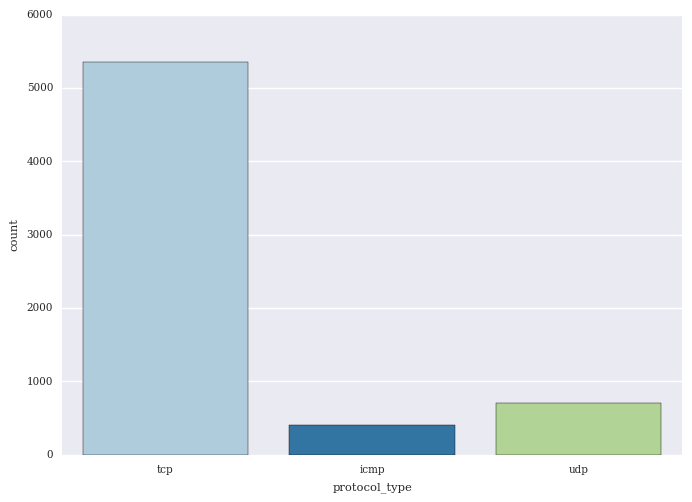

In [34]:
sns.countplot(x='protocol_type', data = connSample, palette='Paired');

In [35]:
print "Percentages of protocol_type:"
100.0*connSample.protocol_type.value_counts()/len(connSample.protocol_type)

Percentages of protocol_type:


tcp     82.946097
udp     10.873606
icmp     6.180297
dtype: float64

------------------------------

* **name:** service
* **description:** network service on the destination, e.g., http, telnet, etc.
* **type:** discrete

In [36]:
#Statistics with all data
conn.describe('service').toPandas()

,summary,service
0,count,125973
1,mean,None
2,stddev,None
3,min,IRC
4,max,whois


In [37]:
#Get all different values
conn.freqItems(['service']).collect()[0]

Row(service_freqItems=[u'whois', u'imap4', u'http_2784', u'uucp', u'netbios_ns', u'mtp', u'courier', u'urp_i', u'uucp_path', u'ntp_u', u'domain', u'csnet_ns', u'ldap', u'private', u'aol', u'netbios_dgm', u'nnsp', u'ftp_data', u'netstat', u'Z39_50', u'kshell', u'remote_job', u'iso_tsap', u'http_8001', u'sunrpc', u'domain_u', u'ftp', u'tftp_u', u'tim_i', u'pop_3', u'link', u'bgp', u'netbios_ssn', u'discard', u'hostnames', u'sql_net', u'name', u'pop_2', u'finger', u'klogin', u'vmnet', u'smtp', u'shell', u'http_443', u'rje', u'X11', u'urh_i', u'eco_i', u'IRC', u'nntp', u'daytime', u'ecr_i', u'time', u'exec', u'harvest', u'ctf', u'auth', u'efs', u'gopher', u'echo', u'http', u'printer', u'telnet', u'supdup', u'red_i', u'pm_dump', u'systat', u'other', u'login', u'ssh'])

In [38]:
#Get the percentage of the values
percentageOf(conn, 'service')

[(u'http', 0.32021147388726157),
 (u'private', 0.17347368086812254),
 (u'domain_u', 0.07178522381780222),
 (u'smtp', 0.05805212228017115),
 (u'ftp_data', 0.05445611361164694),
 (u'eco_i', 0.0364046263881943),
 (u'other', 0.034602652949441544),
 (u'ecr_i', 0.024425869035428226),
 (u'telnet', 0.018678605732974526),
 (u'finger', 0.014026815269938797),
 (u'ftp', 0.013923618553182032),
 (u'auth', 0.007580989577131608),
 (u'Z39_50', 0.006842736141871671),
 (u'uucp', 0.006191803005405921),
 (u'courier', 0.005826645392266597),
 (u'bgp', 0.0056361283767156455),
 (u'whois', 0.005501178824033721),
 (u'uucp_path', 0.005469425988108563),
 (u'iso_tsap', 0.005453549570145984),
 (u'time', 0.005191588673763426),
 (u'imap4', 0.005136021210894398),
 (u'nnsp', 0.005001071658212474),
 (u'vmnet', 0.0048978749414557085),
 (u'urp_i', 0.004778801806736364),
 (u'domain', 0.004516840910353806),
 (u'ctf', 0.004469211656466068),
 (u'csnet_ns', 0.004326323894802854),
 (u'supdup', 0.004318385685821565),
 (u'discard'

In [39]:
connSample.service.describe()

count     6456
unique      64
top       http
freq      2137
Name: service, dtype: object

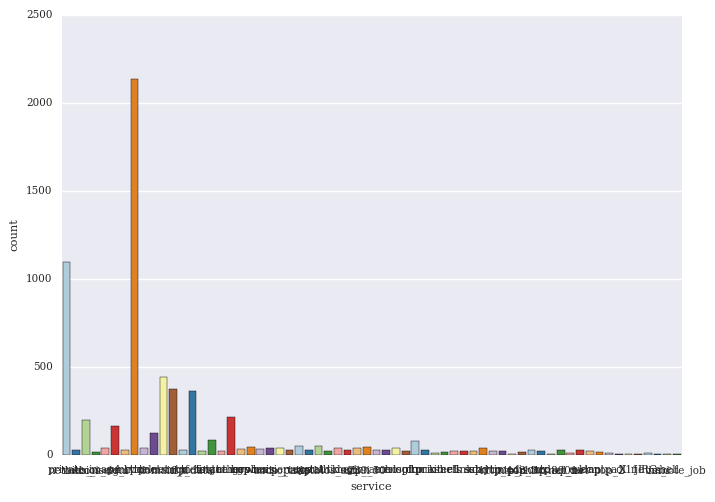

In [40]:
sns.countplot(x='service', data=connSample, palette='Paired');

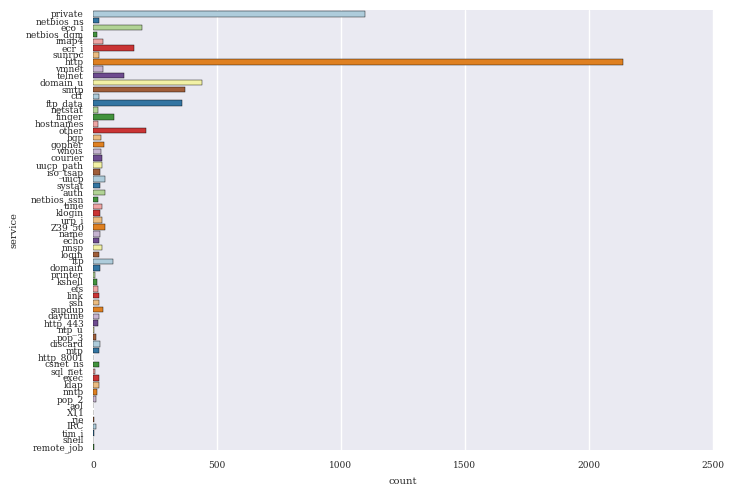

In [41]:
sns.set(font= 'serif', font_scale= 0.65)
sns.countplot(y='service', data=connSample, palette='Paired');

In [42]:
print "Percentages of service's value:"
100.0*connSample.service.value_counts()/len(connSample.service)

Percentages of service's value:


http           33.100991
private        16.976456
domain_u        6.815366
smtp            5.731103
ftp_data        5.576208
other           3.283767
eco_i           3.051425
ecr_i           2.555762
telnet          1.920694
finger          1.285626
ftp             1.208178
auth            0.743494
uucp            0.743494
Z39_50          0.712515
gopher          0.650558
imap4           0.619579
vmnet           0.588600
supdup          0.588600
uucp_path       0.573110
nnsp            0.557621
urp_i           0.542131
time            0.542131
courier         0.542131
whois           0.511152
bgp             0.511152
klogin          0.433705
systat          0.418216
iso_tsap        0.418216
domain          0.402726
name            0.402726
                 ...    
ctf             0.371747
netbios_ns      0.371747
csnet_ns        0.371747
login           0.356258
link            0.356258
daytime         0.356258
ldap            0.356258
ssh             0.340768
mtp             0.340768


---

* **name:** flag
* **description:** normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR
* **type:** discrete

In [43]:
#Statistics with all data
conn.describe('flag').toPandas()

,summary,flag
0,count,125973
1,mean,None
2,stddev,None
3,min,OTH
4,max,SH


In [44]:
#Get all different values
conn.freqItems(['flag']).collect()[0]

Row(flag_freqItems=[u'RSTOS0', u'SF', u'REJ', u'S1', u'OTH', u'S0', u'S3', u'SH', u'S2', u'RSTO', u'RSTR'])

In [45]:
#Get the percentage of the values
percentageOf(conn, 'flag')

[(u'SF', 0.5949290721027521),
 (u'S0', 0.2766545212069253),
 (u'REJ', 0.08916990148682655),
 (u'RSTR', 0.019218403943702222),
 (u'RSTO', 0.01239948242877442),
 (u'S1', 0.0028974462781707192),
 (u'SH', 0.0021512546339294927),
 (u'S2', 0.0010081525406237845),
 (u'RSTOS0', 0.000817635525072833),
 (u'S3', 0.00038897224008319244),
 (u'OTH', 0.0003651576131393235)]

In [46]:
#Get stats with the Sample
connSample.flag.describe()

count     6456
unique      11
top         SF
freq      3797
Name: flag, dtype: object

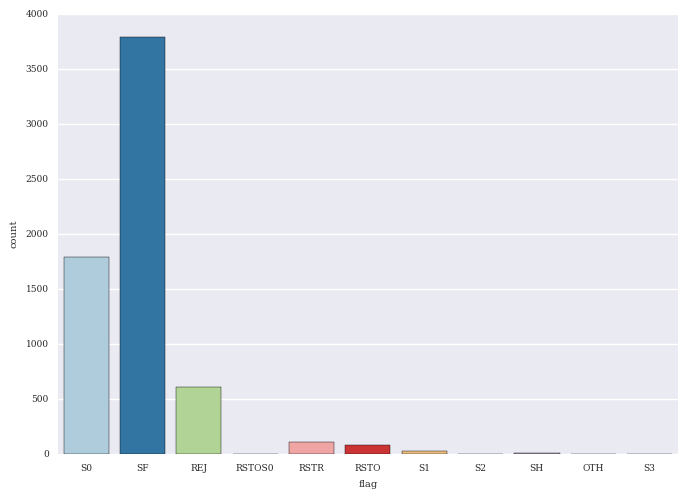

In [47]:
sns.countplot(x='flag', data=connSample, palette='Paired');

In [48]:
connSample.flag.value_counts()

SF        3797
S0        1790
REJ        610
RSTR       115
RSTO        84
S1          30
SH          16
RSTOS0       7
S2           3
S3           3
OTH          1
dtype: int64

In [49]:
print "Percentages of flag's value:"
100.0*connSample.flag.value_counts()/len(connSample.flag)

Percentages of flag's value:


SF        58.813507
S0        27.726146
REJ        9.448575
RSTR       1.781289
RSTO       1.301115
S1         0.464684
SH         0.247831
RSTOS0     0.108426
S2         0.046468
S3         0.046468
OTH        0.015489
dtype: float64

---

* **name:** src_bytes
* **description:** number of data bytes from source to destination
* **type:** continuous

In [50]:
#Statistics with all data
conn.describe('src_bytes').toPandas()

,summary,src_bytes
0,count,125973
1,mean,45566.74271470871
2,stddev,5870307.904371333
3,min,0.0
4,max,1.3799639E9


In [51]:
#Stats with the sample
connSample.src_bytes.describe()

count       6456.000000
mean        8175.484046
std       157205.655660
min            0.000000
25%            0.000000
50%           44.000000
75%          276.000000
max      5133876.000000
Name: src_bytes, dtype: float64

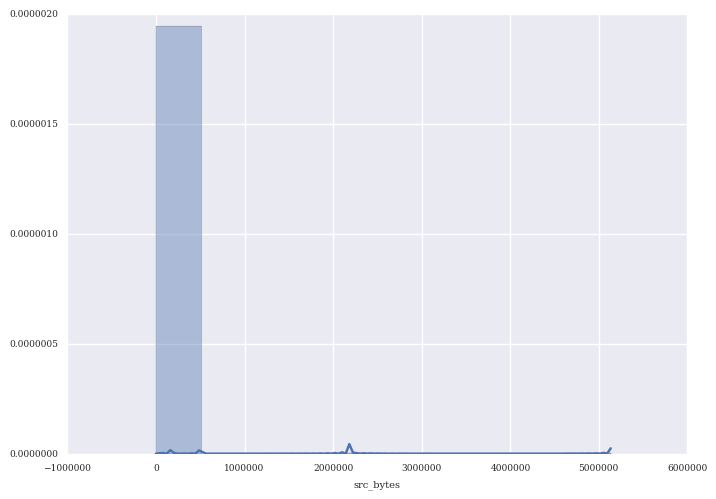

In [52]:
sns.distplot(connSample.src_bytes, bins=10);

##### Skew distribution -> log transformation

In [53]:
np.log(connSample.src_bytes+1).describe()

count    6456.000000
mean        3.224430
std         2.976425
min         0.000000
25%         0.000000
50%         3.806662
75%         5.624018
max        15.451372
Name: src_bytes, dtype: float64

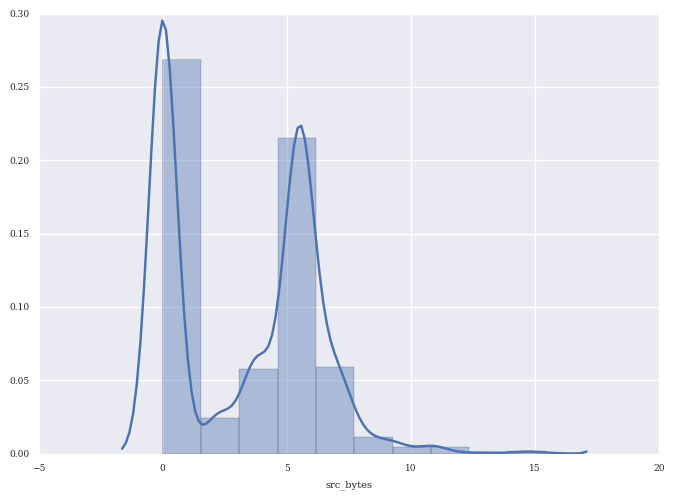

In [54]:
sns.distplot(np.log(connSample.src_bytes+1), bins = 10);

---

* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

In [55]:
#Statistics with all data
conn.describe('dst_bytes').toPandas()

,summary,dst_bytes
0,count,125973
1,mean,19779.114667428734
2,stddev,4021253.276223753
3,min,0.0
4,max,1.30993741E9


In [56]:
#Log transformation with all data
conn.select(log(conn['dst_bytes']+1)).describe().toPandas()

,summary,LOG((dst_bytes + 1))
0,count,125973
1,mean,3.084399587176338
2,stddev,3.5489128991626533
3,min,0.0
4,max,20.99324519286529


In [57]:
#Statistics with sample data
np.log(connSample.dst_bytes+1).describe()

count    6456.000000
mean        3.090811
std         3.540415
min         0.000000
25%         0.000000
50%         0.000000
75%         6.300786
max        13.137321
Name: dst_bytes, dtype: float64

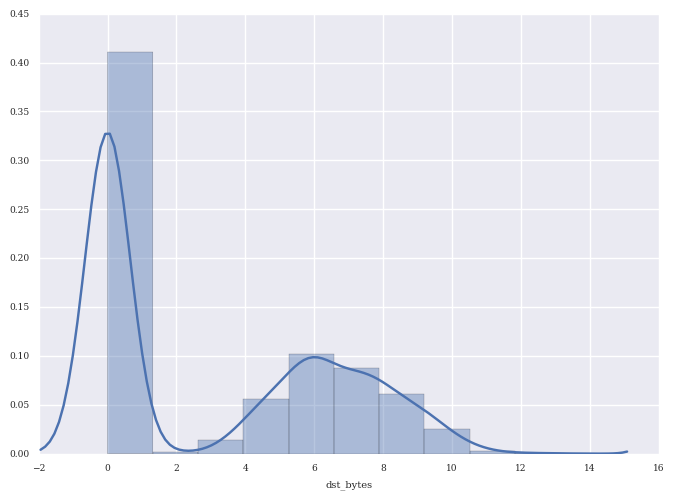

In [58]:
sns.distplot(np.log(connSample.dst_bytes+1), bins = 10);

---

* **name:** land
* **description:** 1 if connection is from/to the same host/port; 0 otherwise
* **type:** discrete

In [59]:
#Statistics with all data
conn.describe('land').toPandas()

,summary,land
0,count,125973
1,mean,1.9845522453224102E-4
2,stddev,0.014086015762311815
3,min,0
4,max,1


In [60]:
numberOf(conn, 'land')

[(u'0', 125948), (u'1', 25)]

In [61]:
connSample.land.describe()

count     6456
unique       2
top          0
freq      6454
Name: land, dtype: object

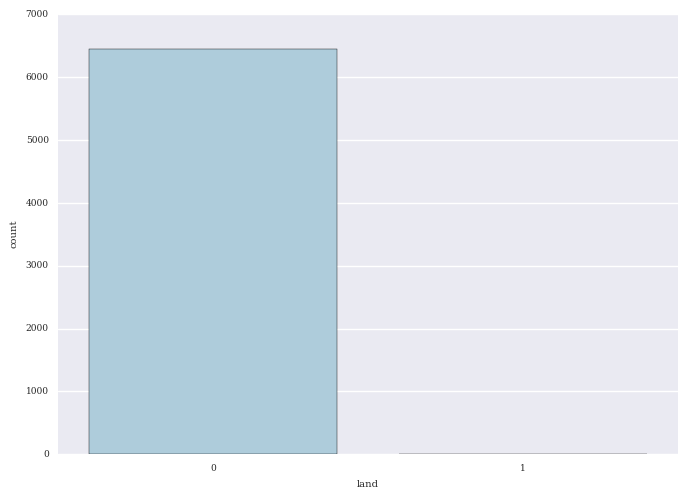

In [62]:
sns.countplot(x='land', data=connSample, palette='Paired');

In [63]:
connSample.land.value_counts()

0    6454
1       2
dtype: int64

In [64]:
print "Percentages of lands's value:"
100.0*connSample.land.value_counts()/len(connSample.land)

Percentages of lands's value:


0    99.969021
1     0.030979
dtype: float64

---

* **name:** wrong_fragment	
* **description:** sum of bad checksum packets in a connection
* **type:** continuous

In [65]:
#Statistics with all data
conn.describe('wrong_fragment').toPandas()

,summary,wrong_fragment
0,count,125973
1,mean,0.022687401268525795
2,stddev,0.25352897966301
3,min,0.0
4,max,3.0


In [66]:
#Get the percentage of the values
numberOf(conn, 'wrong_fragment')

[(0.0, 124883), (3.0, 884), (1.0, 206)]

In [67]:
#Stat from sample data
connSample.wrong_fragment.describe()

count    6456.000000
mean        0.017968
std         0.224010
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.000000
Name: wrong_fragment, dtype: float64

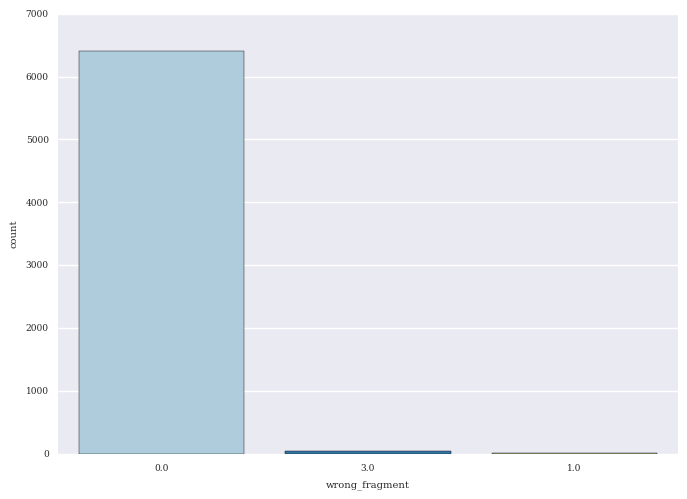

In [68]:
sns.countplot(x= 'wrong_fragment', data= connSample, palette='Paired');

In [69]:
connSample.wrong_fragment.value_counts()

0    6410
3      35
1      11
dtype: int64

In [70]:
print "Percentages of wrong_fragment's value:"
100.0*connSample.wrong_fragment.value_counts()/len(connSample.wrong_fragment)

Percentages of wrong_fragment's value:


0    99.287485
3     0.542131
1     0.170384
dtype: float64

---

* **name:** urgent	
* **description:** number of urgent packets. Urgent packets are packets with the urgent bit activated
* **type:** continuous

In [71]:
#Statistics with all data
conn.describe('urgent').toPandas()

,summary,urgent
0,count,125973
1,mean,1.1113492573805498E-4
2,stddev,0.014365969599780305
3,min,0.0
4,max,3.0


In [72]:
#Get the percentage of the values
numberOf(conn, 'urgent')

[(0.0, 125964), (1.0, 5), (2.0, 3), (3.0, 1)]

In [73]:
connSample.urgent.describe()

count    6456
mean        0
std         0
min         0
25%         0
50%         0
75%         0
max         0
Name: urgent, dtype: float64

In [74]:
connSample.urgent.value_counts()

0    6456
dtype: int64

In [75]:
print "Percentages of urgent's value:"
100.0*connSample.urgent.value_counts()/len(connSample.urgent)

Percentages of urgent's value:


0    100
dtype: float64

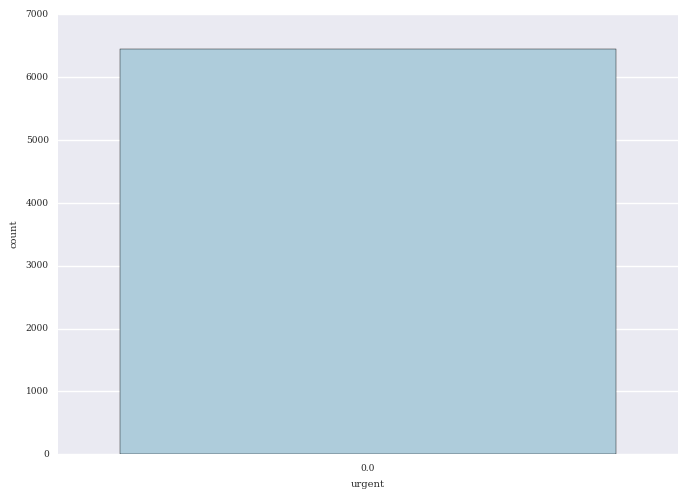

In [76]:
sns.countplot(x = 'urgent', data = connSample, palette="Paired");

#### Conclusions: Univariate Analysis

The most relevant conclusions of univariante Analysis are:
* **duration:** is highly right-skewed. In fact the 92% of the values are 0's. The log transformation without 0's seems to have a bimodal distribution
* **connection_type:** has most of the instances with the values *tcp* (81%)
* **service:** only two values (*http* and *private*) of 70 concentrate the 50% of the instances
* **flag:** only three values (*SF*, *S0* and *REJ*) of 11 concentrate the 95% of the instances
* **src_bytes:** is right-skewed. The log transformation seems to have a bimodal distribution
* **dst_bytes:** is right-skewed. The log transformation seems to have a bimodal distribution
* **land:** actually is a discrete feature with two values: 0 and 1. The 99,98% of the instances have the value 0
* **wrong_fragment:** is a continuous variable with only three values: 0, 1 and 3. The 99.13% of the instances have the value 0
* **urgent:** is a continuous variable with only four values: 0, 1, 2 and 3. The 99.99% of the instances have the value 0


----------

### Bivariate Analysis

###duration vs protocol_type

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

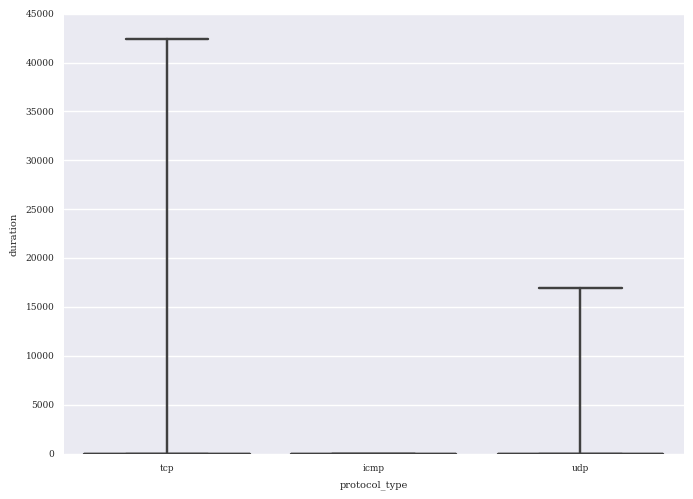

In [77]:
sns.boxplot(x = 'protocol_type', y='duration', data = connSample, palette= 'Paired');

In [78]:
connSample['duration_log'] = np.log(connSample.duration+1)

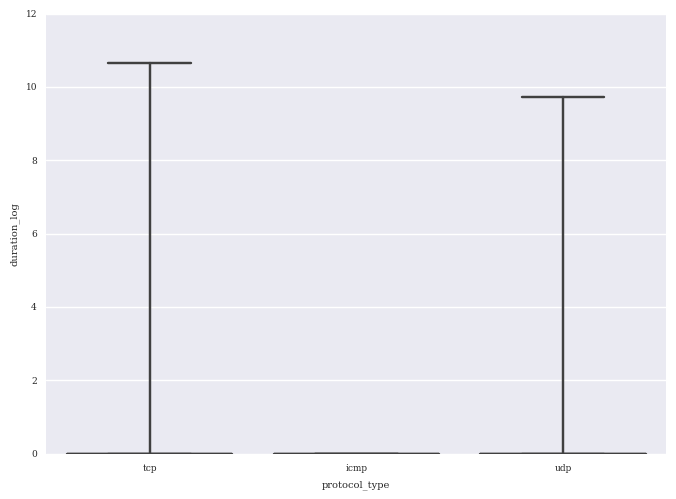

In [79]:
sns.boxplot(x = 'protocol_type', y = 'duration_log', data = connSample, palette= 'Paired');

##### Inspecting the distribution with duration_log more than 0

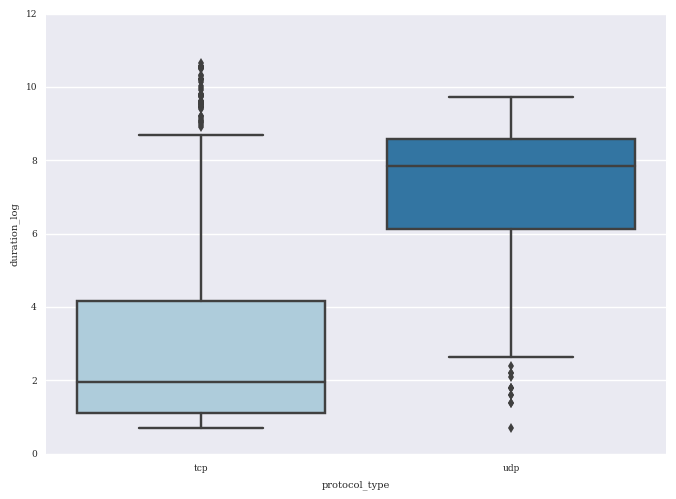

In [80]:
sns.boxplot(x= 'protocol_type', y= 'duration_log'
            , data = connSample[connSample.duration_log > 0]
            , palette = 'Paired');

##### Inspecting the distribution with duration_log == 0

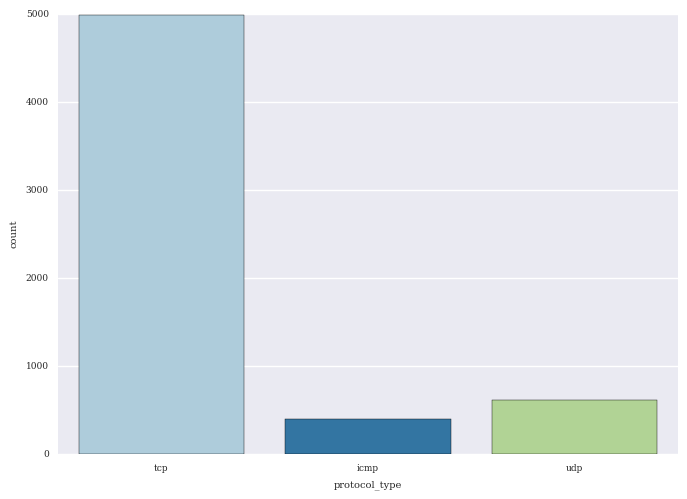

In [81]:
sns.countplot( x='protocol_type' 
              , data = connSample[connSample.duration_log == 0]
              , palette = 'Paired');

####Conclusions duration vs protocol_type analysis
* Regardless the *protocol_type* feature most of the values of *duration* features are 0's
* When the value of *protocol_type* is *'icmp'* all the values of *duration* features is 0
* After the log(x+1) transformation of *protocol_type* and removing the 0's values, the distributions of *duration* is very different between *'tcp'* and *'udp'* 




----------------------------------------------

### Exercise 1
Make the *duration* vs *service* analysis

----------

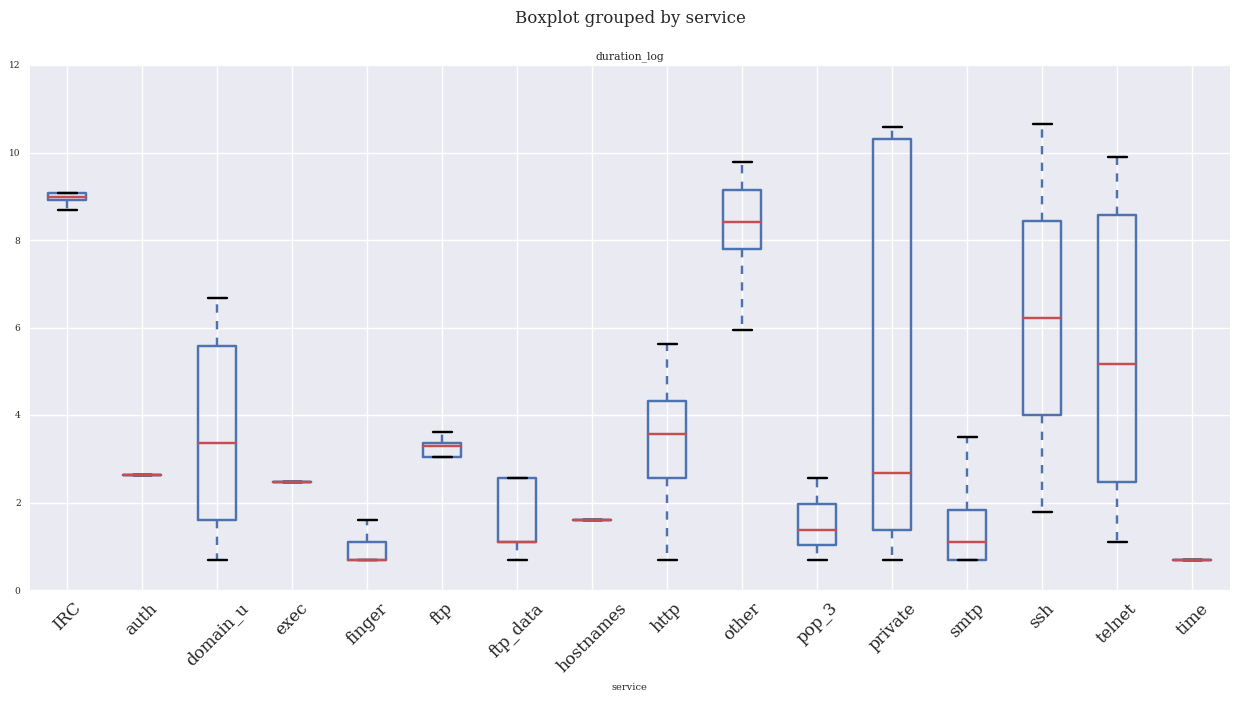

In [82]:
connSample[connSample.duration_log>0].boxplot('duration_log', by='service', rot = 45, figsize = (15, 7));

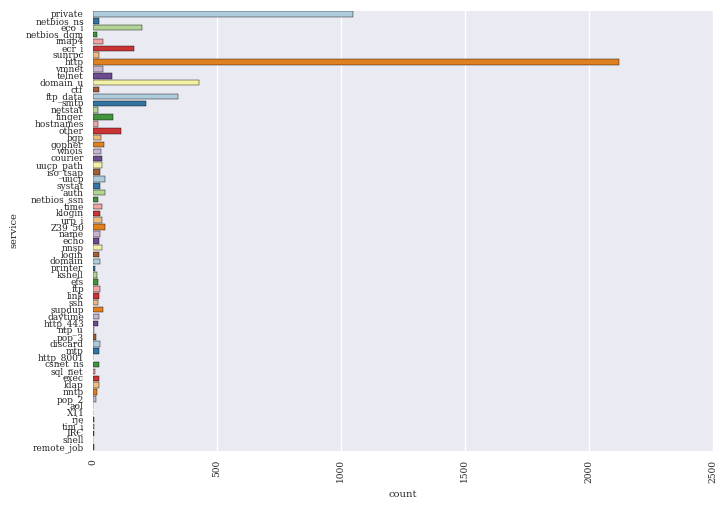

In [83]:
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
sns.countplot(y='service', data = connSample[connSample.duration_log == 0], palette= 'Paired');

### duration vs flag

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** flag
* **description:** normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR
* **type:** discrete

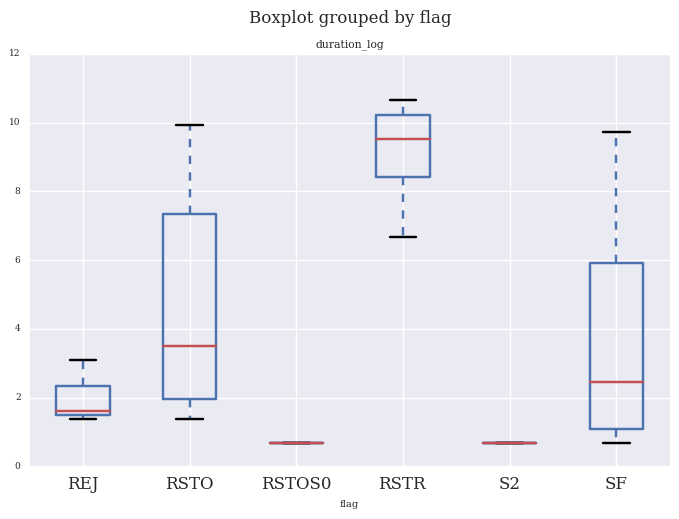

In [84]:
connSample[connSample.duration > 0].boxplot('duration_log', by='flag');

##### Inspecting the distribution with duration_log == 0

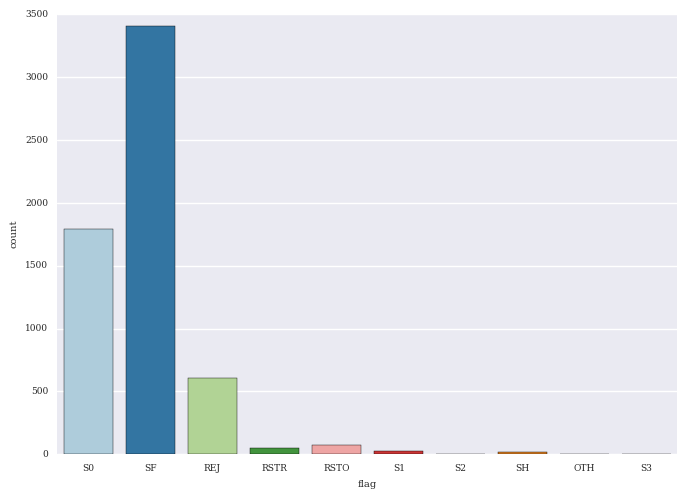

In [85]:
sns.countplot(x = 'flag', data = connSample[connSample.duration_log == 0], palette= 'Paired');

In [86]:
print "Percentages of flag's value:"
100.0*connSample[connSample.duration_log == 0].flag.value_counts()/len(connSample[connSample.duration_log == 0].flag)

Percentages of flag's value:


SF      56.973442
S0      29.898113
REJ     10.138634
RSTO     1.269417
RSTR     0.851846
S1       0.501086
SH       0.267246
S3       0.050109
S2       0.033406
OTH      0.016703
dtype: float64

####Conclusions duration vs flag analysis
* Regardless the *flag* feature most of the values of *duration* features are 0's
* After the log(x+1) transformation of *flag* and removing the 0's values, the distributions of *duration* is very different in *'RSTR'* and *'RSTOS0'* categories 
* If duration_log is 0, only three values (*SF*, *S0* and *REJ*) of 11 concentrate the 96% of the instances


----------------------------------------------

### duration vs src_bytes

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** src_bytes
* **description:** number of data bytes from source to destination
* **type:** continuous

In [87]:
connSample['src_bytes_log'] = np.log(connSample.src_bytes+1)

**Inspecting with duration > 0 **

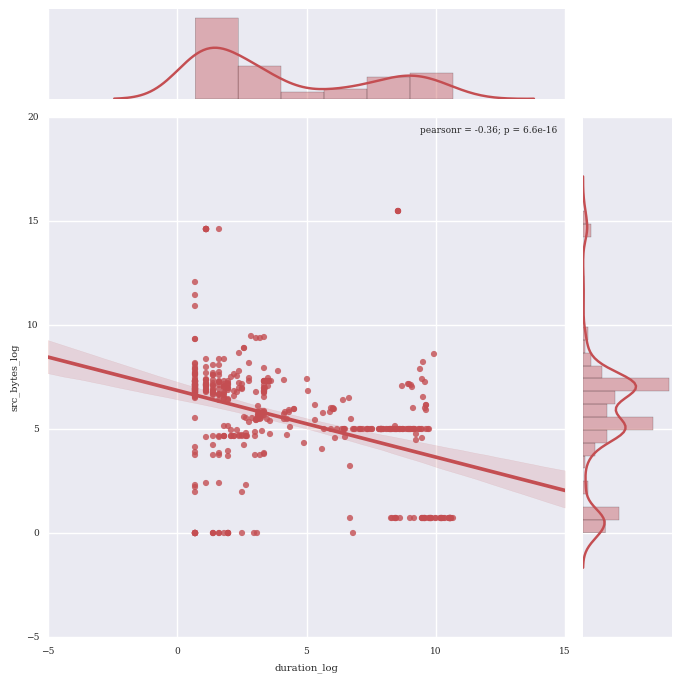

In [88]:
color = sns.color_palette()[2]
sns.jointplot("duration_log", "src_bytes_log", data=connSample[connSample.duration>0], 
              kind="reg", color = color, size=7);

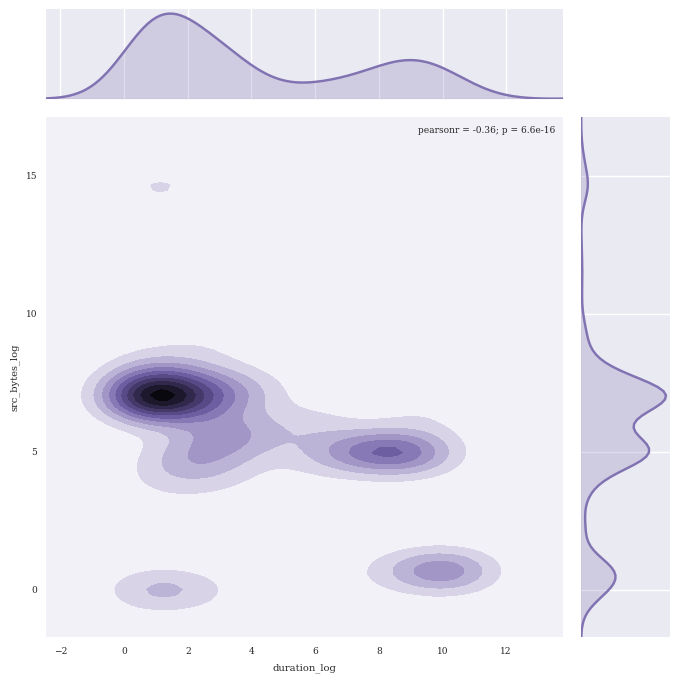

In [89]:
#with kde (Kernel density estimation)
color = sns.color_palette()[3]
sns.jointplot("duration_log", "src_bytes_log", 
              data=connSample[connSample.duration>0], 
              kind="kde", color = color, size=7);

**Inspecting with duration == 0 **

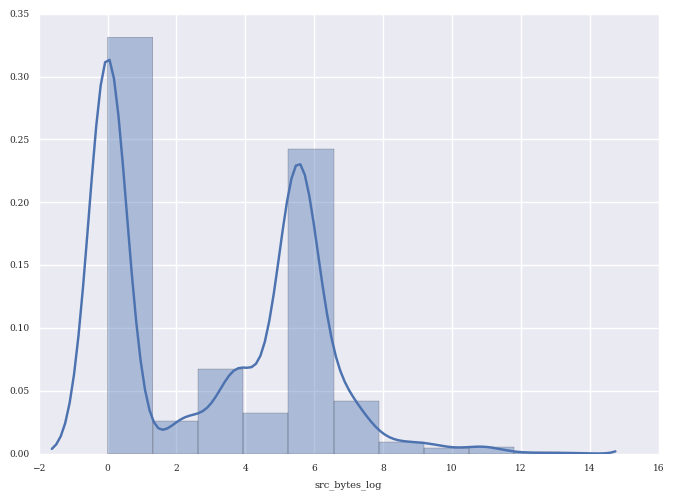

In [90]:
sns.distplot(connSample[connSample.duration_log == 0].src_bytes_log, bins = 10);

**Inspecting with src_bytes_log == 0 **

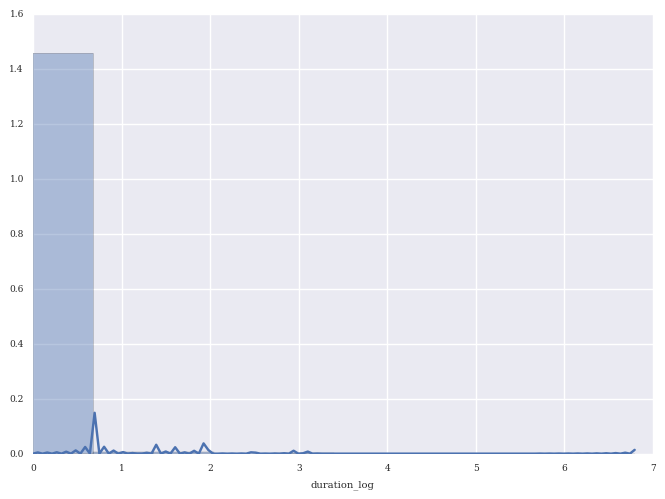

In [91]:
sns.distplot(connSample[connSample.src_bytes_log == 0].duration_log, bins = 10);

####Conclusions duration vs src_bytes analysis
The analysis was splited in three cases:
* Case 1: *duration_log* and *src_bytes_logs* are greater than 0:
    - There are not strong correlation between *duration_log* and *src_bytes_log*
    - On the other hand, it seems there are some clusters between both variables
* Case 2: *duration_log* is equal to 0:
    - It seems *src_bytes* has a multimodal distribution
* Case 3: *src_bytes_log* is equal to 0:
    - Most of the values of *duration_log* is equal to 0




----------------------------------------------

### duration vs dst_bytes

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

In [92]:
connSample['dst_bytes_log'] = np.log(connSample.dst_bytes+1)

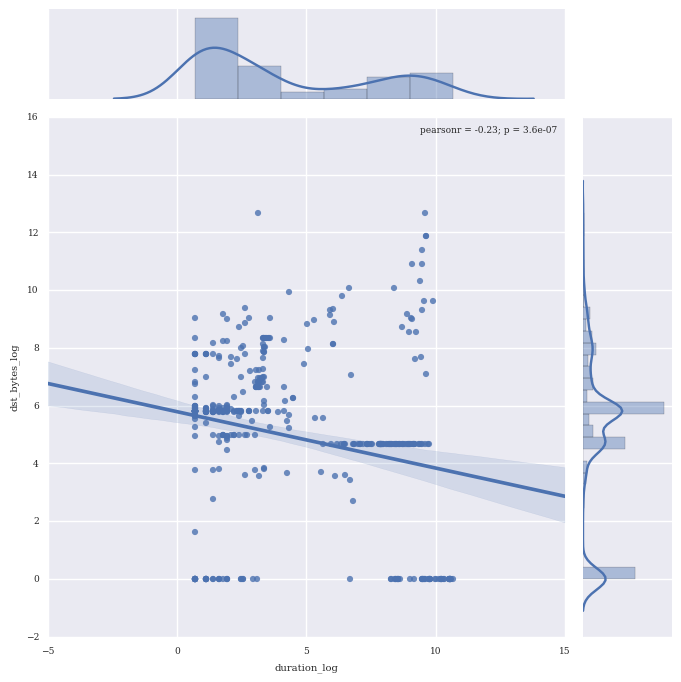

In [93]:
sns.jointplot("duration_log", "dst_bytes_log", 
              data= connSample[connSample.duration>0], 
              kind="reg", size=7);

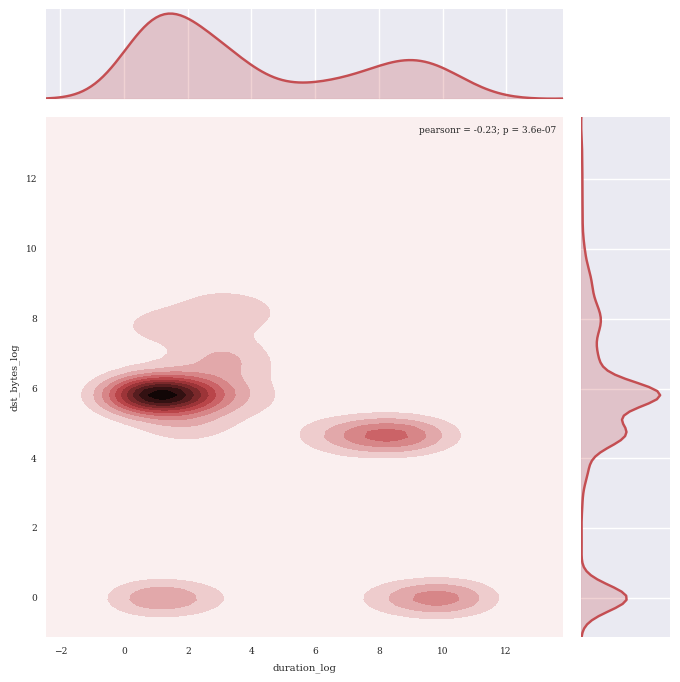

In [94]:
#with kde (Kernel density estimation)
color = sns.color_palette()[2]
sns.jointplot("duration_log", "dst_bytes_log", 
              data= connSample[connSample.duration>0], 
              color = color, kind="kde", size=7);

**Inspecting with duration == 0 **

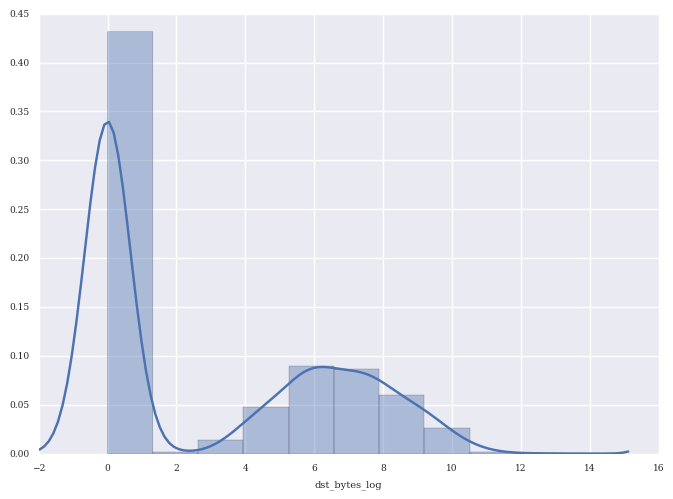

In [95]:
sns.distplot(connSample[connSample.duration_log == 0].dst_bytes_log, bins = 10);

**Inspecting with dst_bytes_log == 0 **

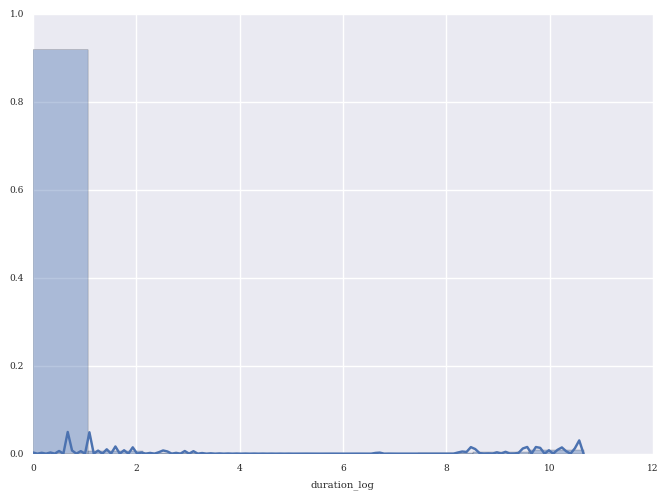

In [96]:
sns.distplot(connSample[connSample.dst_bytes_log == 0].duration_log, bins = 10);

####Conclusions duration vs dst_bytes analysis
The analysis was splited in three cases:
* Case 1: *duration_log* and *dst_bytes_logs* are greater than 0:
    - There are not strong correlation between *duration_log* and *dst_bytes_log*
    - On the other hand, it seems there are some clusters between both variables
* Case 2: *duration_log* is equal to 0:
    - It seems *dst_bytes* has a bimodal distribution
* Case 3: *dst_bytes_log* is equal to 0:
    - Most of the values of *duration_log* is equal to 0




----------------------------------------------

### duration vs land

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** land
* **description:** 1 if connection is from/to the same host/port; 0 otherwise
* **type:** discrete

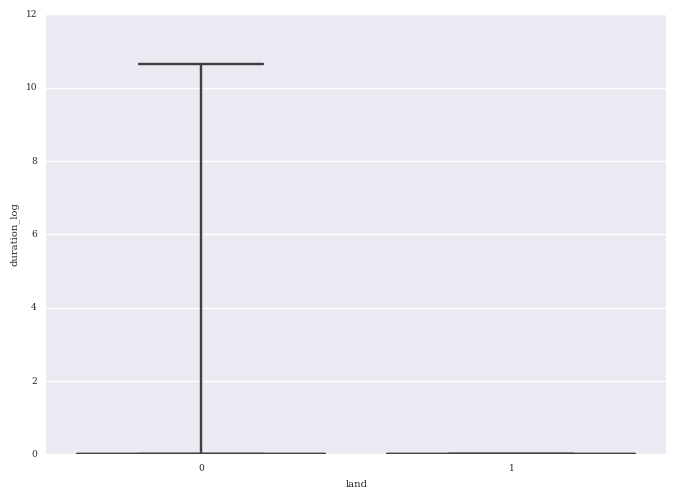

In [97]:
sns.boxplot(x = "land", y = "duration_log", data= connSample, palette= 'Paired');

In [98]:
connSample.pivot_table("duration_log","land", aggfunc=np.average)

land
0    0.297809
1    0.000000
Name: duration_log, dtype: float64

**Inspecting with duration > 0 **

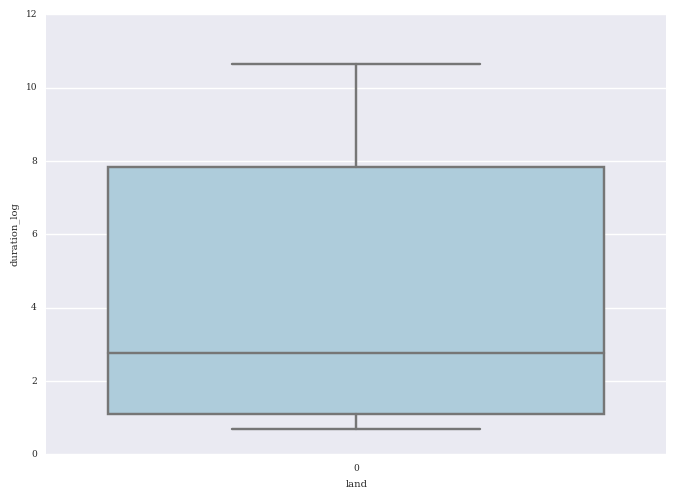

In [99]:
sns.boxplot(x = "land", y = "duration_log", 
            data= connSample[connSample.duration > 0], 
            palette= 'Paired');

####Conclusions duration vs land analysis
* If *duration_log* is greater than 0 then we have only values with *land* == 0 and its distribution is right-skewed




----------------------------------------------

### duration vs wrong_fragment

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** wrong_fragment	
* **description:** sum of bad checksum packets in a connection
* **type:** continuous

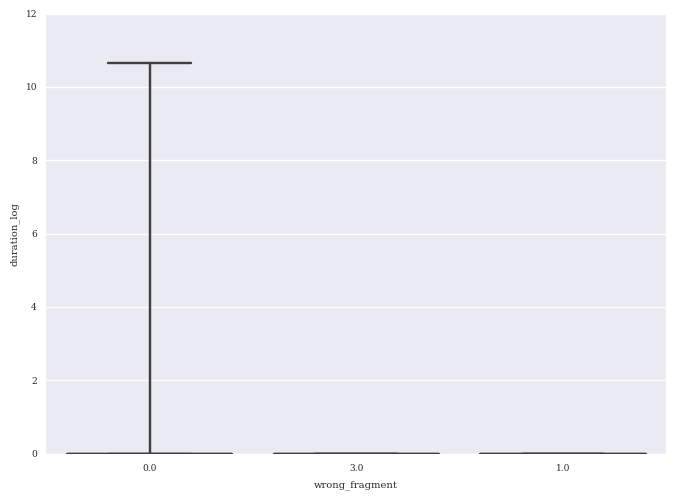

In [100]:
sns.boxplot(x= 'wrong_fragment', y= 'duration_log', 
           data = connSample, 
           palette = 'Paired');

In [101]:
connSample.pivot_table("duration_log","wrong_fragment", aggfunc=np.average)

wrong_fragment
0    0.299854
1    0.000000
3    0.000000
Name: duration_log, dtype: float64

**Inspecting with duration > 0 **

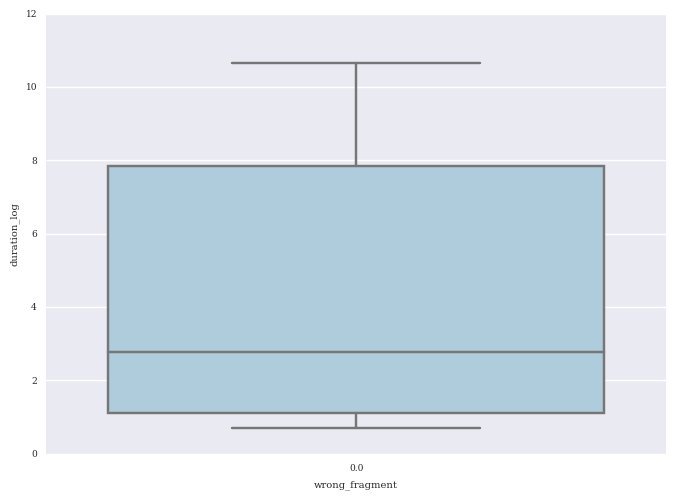

In [102]:
sns.boxplot(x= 'wrong_fragment', y= 'duration_log', 
           data = connSample[connSample.duration_log > 0], 
           palette = 'Paired');

####Conclusions duration vs wrong_fragment

* If *duration_log* is greater than 0 then we have only values with *wrong_fragment* == 0 and its distribution is right-skewed




----------------------------------------------

### Exercicie 2: duration vs urgent

* **name:** duration
* **description:** length (number of seconds) of the connection
* **type:** continuous


* **name:** urgent	
* **description:** number of urgent packets. Urgent packets are packets with the urgent bit activated
* **type:** continuous

####Conclusions duration vs urgent




----------------------------------------------

### protocol_type vs service

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

* **name:** service
* **description:** network service on the destination, e.g., http, telnet, etc.
* **type:** discrete

In [103]:
connSample.pivot_table("attack", "service","protocol_type", aggfunc=len)

protocol_type,icmp,tcp,udp
service,,,
IRC,NaN,10,NaN
X11,NaN,1,NaN
Z39_50,NaN,46,NaN
aol,NaN,1,NaN
auth,NaN,48,NaN
bgp,NaN,33,NaN
courier,NaN,35,NaN
csnet_ns,NaN,24,NaN
ctf,NaN,24,NaN


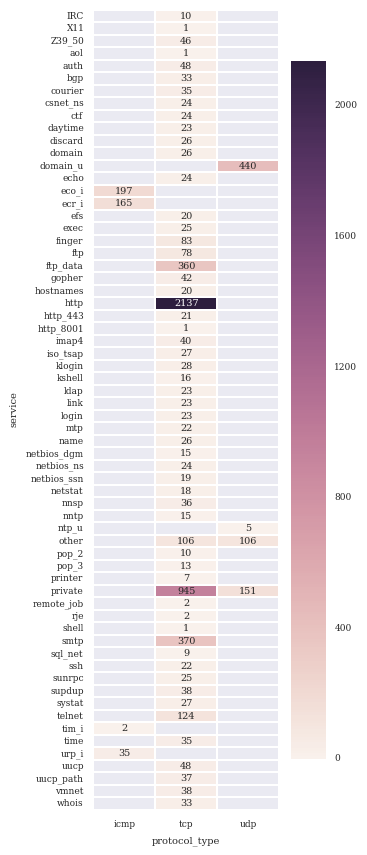

In [104]:
sns.set(font= 'serif', font_scale=0.65, rc={"figure.figsize": (3, 10)})
sns.heatmap(connSample.pivot_table("attack", "service","protocol_type", aggfunc=len), 
            square= False,
            annot=True, annot_kws={"size": 7}, fmt=".0f", linewidths= .5);

####Conclusions protocol_type vs service analysis
* Except two general services (*'other'* and *'private'*) all the *services* categories belong to a *protocol_type* category




----------------------------------------------

###protocol_type vs flag

* **name:** protocol_type
* **description:** type of the protocol, e.g. tcp, udp, etc.
* **type:** discrete

* **name:** flag
* **description:** normal or error status of the connection. The possible status are this: SF, S0, S1, S2, S3, OTH, REJ, RSTO, RSTOS0, SH, RSTRH, SHR
* **type:** discrete

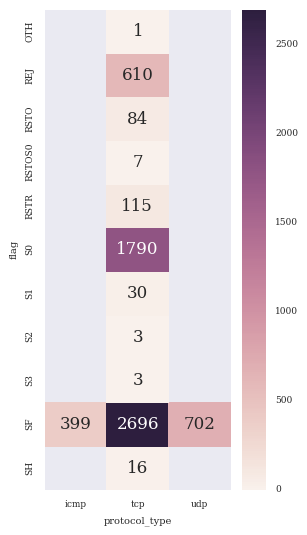

In [105]:
sns.set(font= 'serif', font_scale=0.65, rc={"figure.figsize": (3, 6)})
sns.heatmap(connSample.pivot_table("attack", "flag","protocol_type", aggfunc=len), 
            annot=True, fmt=".0f");

####Conclusions protocol_type vs flag analysis
* All *flag* categories beleng only to *'tcp'* *protocol_type* except *'SF'* flag that belongs to the three *protocol_type*s



----------------------------------------------

### Exercise 3: protocol_type vs src_bytes
Make the *protocol_type* vs *src_bytes* analysis

----------

### Exercise 4: protocol_type vs dst_bytes
Make the *protocol_type* vs *dst_bytes* analysis

----------

### Multivariate Analysis

### src_bytes & dst_bytes & wrong_fragmnet & urgent vs class

* **name:** urgent	
* **description:** number of urgent packets. Urgent packets are packets with the urgent bit activated
* **type:** continuous

* **name:** src_bytes
* **description:** number of data bytes from source to destination
* **type:** continuous

* **name:** dst_bytes
* **description:** number of data bytes from destination to source
* **type:** continuous

* **name:** wrong_fragment	
* **description:** sum of bad checksum packets in a connection
* **type:** continuous

* **name:** attack	
* **description:** is the label attribute and indicates which type of connections is each instance: normal or which attack. The values it can take are the following: *anomaly, dict, dict_simple, eject, eject-fail, ffb, ffb_clear, format, format_clear, format-fail, ftp-write, guest, imap, land, load_clear, loadmodule, multihop, perl_clear, perlmagic, phf, rootkit, spy, syslog, teardrop, warez, warezclient, warezmaster, pod, back, ip- sweep, neptune, nmap, portsweep, satan, smurf and normal*
* **type:** discrete

In [106]:
#creation of "is_attack" attribute to differentiate the normal connections vs attack connections
connSample["is_attack"] = connSample["attack"].map(lambda x: int(x != "normal"))

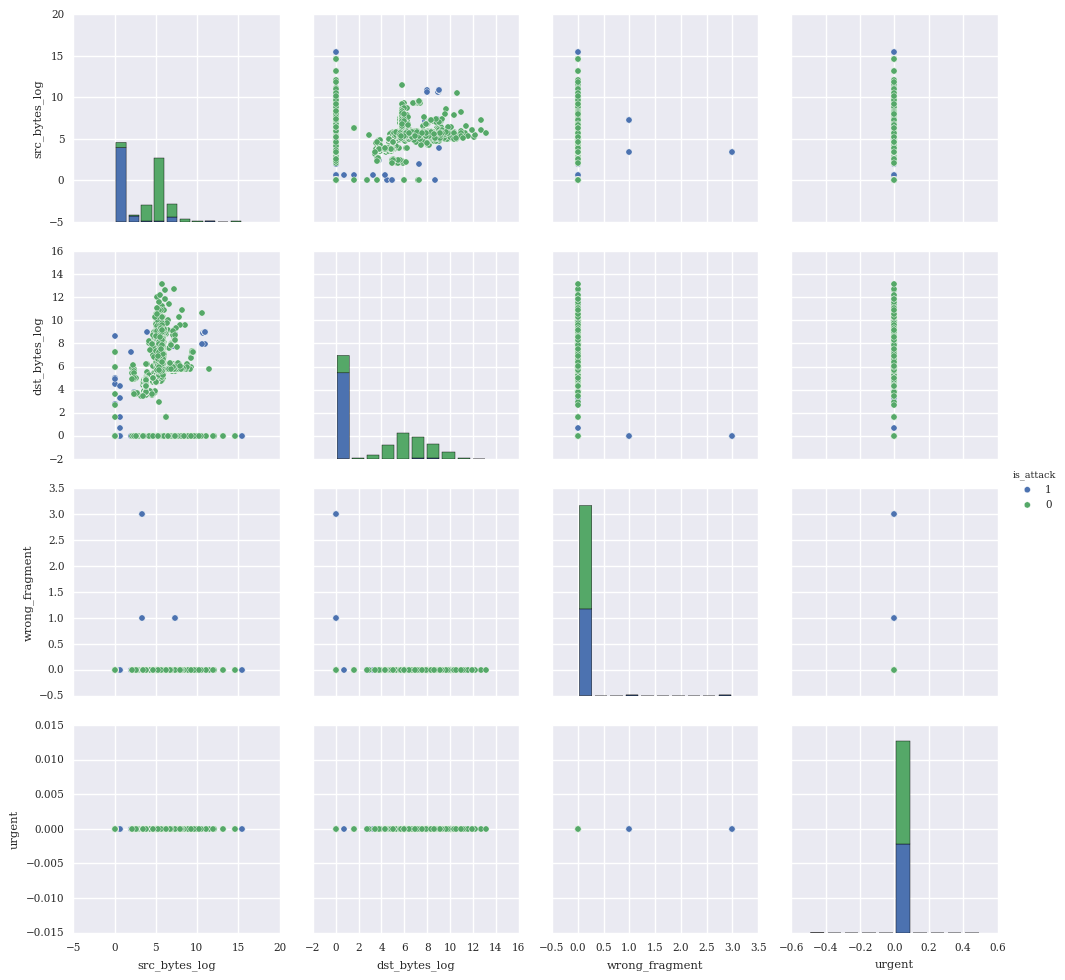

In [113]:
sns.pairplot(connSample, 
             vars=['src_bytes_log','dst_bytes_log','wrong_fragment','urgent'], 
             hue='is_attack');